In [1]:
import pandas as pd
from math import sin, cos, asin, sqrt, pi
import matplotlib
import geopandas
from matplotlib import pyplot as plt
import math
import numpy as np

/home/gautam/.local/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
data=geopandas.read_file("zip://../dataset/Water_Main_Breaks-shp.zip")
data["FacilityID"]=data["MainID"]
data

,OBJECTID,Cell_rotat,mslink,break_num,pipe_mslin,pipe_type,break_date,house_num,street_dir,street_nam,...,created_da,last_edite,last_edi_1,BreakType,BreakTypeO,StreetSegm,CWWOID,CWWOClosed,TotalHours,geometry
0,1,359.603239,1.0,225.0,18715.0,MAIN,2007-11-01,918.0,None,Regent,...,1970-01-01,None,1970-01-01,None,None,4996,None,1970-01-01,NaN,POINT (-89.40211 43.06769)
1,3,359.602939,27.0,226.0,15257.0,MAIN,2007-11-02,2255.0,None,Myrtle,...,1970-01-01,WUPTB,2018-02-15,None,None,2031,None,1970-01-01,NaN,POINT (-89.35369 43.10999)
2,4,359.602863,28.0,227.0,12532.0,MAIN,2007-11-05,3701.0,None,Margaret,...,1970-01-01,WUPTB,2018-02-15,None,None,2610,None,1970-01-01,NaN,POINT (-89.32397 43.08879)
3,5,44.602085,30.0,228.0,11178.0,MAIN,2007-11-07,533.0,None,Shady Wood,...,1970-01-01,WUPTB,2018-02-15,None,None,3299,None,1970-01-01,NaN,POINT (-89.29538 43.09066)
4,7,359.602838,32.0,230.0,12647.0,MAIN,2007-11-09,3906.0,None,Margaret,...,1970-01-01,WUPTB,2018-02-15,None,None,3055,None,1970-01-01,NaN,POINT (-89.31824 43.08942)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6988,59449,NaN,NaN,71678.0,NaN,SERVICE (WU),1970-01-01,NaN,None,None,...,2020-09-22,WUJAG,2020-09-22,None,None,None,None,1970-01-01,NaN,POINT (-89.47167 43.02902)
6989,59450,NaN,NaN,71670.0,NaN,MAIN,1970-01-01,NaN,None,None,...,2020-09-22,WUJAG,2020-09-22,None,None,None,None,1970-01-01,NaN,POINT (-89.44371 43.04018)
6990,59451,NaN,NaN,71715.0,NaN,MAIN,1970-01-01,NaN,None,None,...,2020-09-22,WUJAG,2020-09-22,None,None,None,None,1970-01-01,NaN,POINT (-89.39218 43.05226)
6991,59452,NaN,NaN,71789.0,NaN,MAIN,1970-01-01,NaN,None,None,...,2020-09-22,WUJAG,2020-09-22,None,None,None,None,1970-01-01,NaN,POINT (-89.39753 43.05303)


In [3]:
wm = geopandas.read_file("zip://../dataset/WaterMains.zip")

wm["Material"].replace({"CI": "Legacy Iron", "SAND": "Legacy Iron","SPUN":"Legacy Iron"}, inplace=True)
wm

,OBJECTID,FacilityID,InstallYea,LifecycleS,Diameter,Material,Bagged,LiningType,Shape_STLe,geometry
0,1,MAIN-4869-1,1981,ACT,16.0,DI,0,CM,3.646795,"LINESTRING (818246.809 465305.287, 818250.456 ..."
1,2,MAIN-4869-2,1981,ACT,16.0,DI,0,CM,3.500123,"LINESTRING (818250.645 465308.776, 818250.456 ..."
2,3,MAIN-4969-3,1981,ACT,16.0,DI,0,CM,3.499850,"LINESTRING (819023.477 465921.541, 819025.375 ..."
3,4,MAIN-4969-4,1981,ACT,16.0,DI,0,CM,7.648740,"LINESTRING (819025.375 465918.600, 819032.423 ..."
4,5,MAIN-4969-5,1981,ACT,16.0,DI,0,CM,1127.874973,"LINESTRING (818330.485 465303.820, 818346.420 ..."
...,...,...,...,...,...,...,...,...,...,...
22515,419693,MAIN-1448-25169,2020,ACT,8.0,DI,1,CM,111.669489,"LINESTRING (773693.791 484574.175, 773693.674 ..."
22516,419694,MAIN-1447-25170,2020,ACT,8.0,DI,1,CM,831.525282,"LINESTRING (773691.327 484690.979, 773691.253 ..."
22517,420093,MAIN-2656-25171,1969,ACT,6.0,DI,1,CM,38.955988,"LINESTRING (788198.035 477702.644, 788198.153 ..."
22518,1168,MAIN-2455-1168,1994,ACT,16.0,DI,1,CM,516.630823,"LINESTRING (785556.369 477740.132, 785556.743 ..."


In [4]:
def cdf_calculator(df):
    prev=df.index[0]
    for i in df.index:
        if i !=prev:
            df["Material"][i]+=df["Material"][prev]
        prev=i
    df["Material"]/=max(df["Material"])
    return df

In [5]:
size_material=wm[["Material","Diameter"]]
size_material=size_material.sort_values("Diameter").reset_index().dropna()
size_material=size_material[["Material","Diameter"]]

In [6]:
material_list_size=wm["Material"].unique()[:-1]
material_list_size=np.append(material_list_size,"All")
material_list_size

array(['DI', 'Legacy Iron', 'COPPER', 'HDPE', 'CIPP', 'PVC', 'All'],
      dtype=object)

In [7]:
total_cdf_1=cdf_calculator(size_material.groupby(by='Diameter').count())
di_cdf_1=cdf_calculator(size_material[size_material["Material"]=="DI"].groupby(by='Diameter').count())
li_cdf_1=cdf_calculator(size_material[size_material["Material"]=="Legacy Iron"].groupby(by='Diameter').count())

In [8]:
ms=wm.merge(data, on='FacilityID', how='left')
depth_material=ms[["pipe_depth","Material"]]
depth_material=depth_material.dropna()

In [9]:
wms=wm[["Material","Diameter","FacilityID"]]
ms=data.merge(wms, on='FacilityID', how='left')
size_material=ms[["Material","Diameter"]]
size_material=size_material.sort_values("Diameter").reset_index().dropna()
size_material=size_material[["Material","Diameter"]]

In [10]:
material_list_size

array(['DI', 'Legacy Iron', 'COPPER', 'HDPE', 'CIPP', 'PVC', 'All'],
      dtype=object)

In [11]:
material_list_size=ms["Material"].unique()
material_list_size=list(np.append(material_list_size,"Total"))
material_list_size.remove(None)
material_list_size.remove(np.nan)
material_list_size.remove("PVC")
material_list_size.remove("COPPER")
material_list_size

['Legacy Iron', 'DI', 'Total']

In [12]:
total_cdf_2=cdf_calculator(size_material.groupby(by='Diameter').count())
di_cdf_2=cdf_calculator(size_material[size_material["Material"]=="DI"].groupby(by='Diameter').count())
li_cdf_2=cdf_calculator(size_material[size_material["Material"]=="Legacy Iron"].groupby(by='Diameter').count())

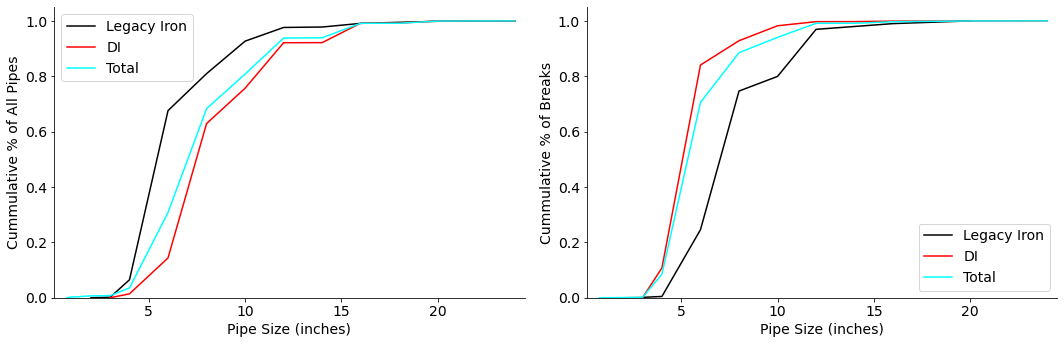

In [13]:
matplotlib.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
li_cdf_1.plot(color="black",ax=ax1)
di_cdf_1.plot(color="r",ax=ax1)
total_cdf_1.plot(color="cyan",ax=ax1)
ax1.legend(material_list_size)
ax1.set_xlim([0.1,24.5])
ax1.set_ylim([0,1.05])
ax1.set_ylabel("Cummulative % of All Pipes")
ax1.set_xlabel("Pipe Size (inches)")
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

bx = fig.add_subplot(122)
di_cdf_2.plot(color="black",ax=bx)
li_cdf_2.plot(color="r",ax=bx)
total_cdf_2.plot(color="cyan",ax=bx)
bx.set_xlim([0.1,24.5])
bx.set_ylim([0,1.05])
bx.set_ylabel("Cummulative % of Breaks")
bx.set_xlabel("Pipe Size (inches)")
bx.legend(material_list_size)
bx.spines["top"].set_visible(False)
bx.spines["right"].set_visible(False)
plt.tight_layout()

In [14]:
material_list_size=['Legacy Iron', 'DI', "Broken Legacy Iron", "Broken DI"]

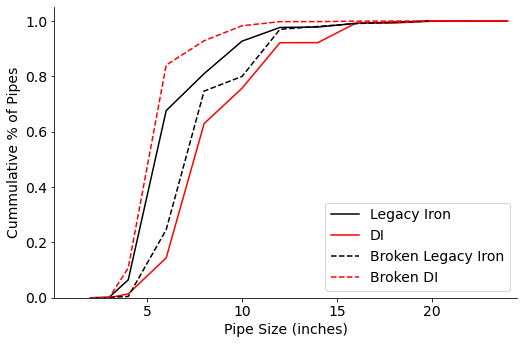

In [15]:
matplotlib.rcParams.update({'font.size': 14})
fig,ax1 = plt.subplots(figsize=(7.5,5))

li_cdf_1.plot(color="black",ax=ax1)
di_cdf_1.plot(color="r",ax=ax1)

di_cdf_2.plot(color="black",linestyle='dashed', ax=ax1)
li_cdf_2.plot(color="r",linestyle='dashed', ax=ax1)

ax1.legend(material_list_size)
ax1.set_xlim([0.1,24.5])
ax1.set_ylim([0,1.05])
ax1.set_ylabel("Cummulative % of Pipes")
ax1.set_xlabel("Pipe Size (inches)")
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("legacy_cdf.png")

In [16]:
li_cdf_2

,Material
Diameter,
2.0,0.000154
3.0,0.001081
4.0,0.107783
6.0,0.840488
8.0,0.928351
10.0,0.982397
12.0,0.997221
14.0,0.997375
16.0,0.999074


In [17]:
di_cdf_2

,Material
Diameter,
3.0,0.001635
4.0,0.004905
6.0,0.245777
8.0,0.746594
10.0,0.799455
12.0,0.969482
16.0,0.990191
20.0,1.000000
